# Figure 3

This code can be used to reproduce Figure 3.
Note however that this Figure reports timings and hence 
obtained results can be different from one execution environment to the other.
Nevertheless, trends should be similar, since they reflect theoretical complexity.

In [1]:
import time
import numpy as np
import torch
import matplotlib.pyplot as plt
from tslearn.metrics import dtw, soft_dtw

from dtw_gi import dtw_gi, softdtw_gi
from utils import set_fig_style

# Experiment parameters
np.random.seed(0)
torch.manual_seed(0)

n_repeats = 10

sizes = [8, 16, 32, 64, 128, 256, 512, 1024]
dimensions = [8, 16, 32, 64, 128, 256, 512, 1024]

base_sz = 32
base_dim = 8
gamma = .1

# Tested similarity measures
list_functions = [
    dtw,
    lambda x, y: soft_dtw(x, y, gamma=gamma),
    lambda x, y: dtw_gi(x, y, max_iter=5000, use_bias=True),
    lambda x, y: softdtw_gi(x, y, gamma=gamma, max_iter=5000,
                            stiefel_opt=True,
                            early_stopping_patience=100)
]
list_names = ["DTW", "softDTW", "DTW-GI", "softDTW-GI"]

In [2]:
# Timings as a function of time series length
dict_durations = {f_name: {} for f_name in list_names}
for sz in sizes:
    dataset0 = np.random.randn(n_repeats, sz, base_dim)
    dataset1 = np.random.randn(n_repeats, sz, base_dim)

    for (f, f_name) in zip(list_functions, list_names):
        # A way to avoid cache-related artefacts?
        f(dataset0[-1], dataset1[-1])

        durations = []
        for i in range(n_repeats):
            t0 = time.time()
            f(dataset0[i], dataset1[i])
            durations.append(time.time() - t0)
        dict_durations[f_name][sz] = durations

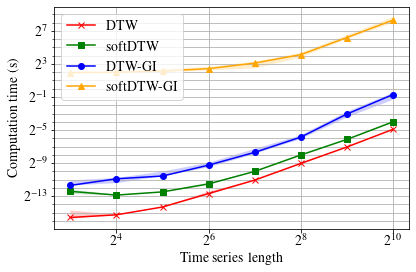

In [3]:
set_fig_style(font_size=14)
perc = 20
colors = ["r", "g", "b", "orange"]
markers = ["x", "s", "o", "^"]

plt.figure()
for idx_f, f_name in enumerate(list_names):
    plt.loglog(sizes,
               [np.median(dict_durations[f_name][sz]) for sz in sizes],
               label=f_name, marker=markers[idx_f], c=colors[idx_f],
               basex=2, basey=2)
    plt.fill_between(sizes,
                     [np.percentile(dict_durations[f_name][sz], perc)
                      for sz in sizes],
                     [np.percentile(dict_durations[f_name][sz], 100 - perc)
                      for sz in sizes],
                     alpha=0.2, facecolor=colors[idx_f])
plt.xlabel("Time series length")
plt.ylabel("Computation time (s)")
plt.legend(loc="upper left")
plt.gca().set_yticks([2 ** i for i in range(-16, 10)], minor=True)
plt.gca().yaxis.set_minor_formatter(plt.NullFormatter())
plt.grid(True, which="both")
plt.tight_layout()
plt.show()

In [4]:
# Timings as a function of time series dimensionality
dict_durations = {f_name: {} for f_name in list_names}
for d in dimensions:
    dataset0 = np.random.randn(n_repeats, base_sz, d)
    dataset1 = np.random.randn(n_repeats, base_sz, d)

    for f, f_name in zip(list_functions, list_names):
        print(d, f_name)
        # To avoid cache-related artefacts?
        f(dataset0[-1], dataset1[-1])

        durations = []
        for i in range(n_repeats):
            t0 = time.time()
            f(dataset0[i], dataset1[i])
            durations.append(time.time() - t0)
        dict_durations[f_name][d] = durations

8 DTW
8 softDTW
8 DTW-GI
8 softDTW-GI
16 DTW
16 softDTW
16 DTW-GI
16 softDTW-GI
32 DTW
32 softDTW
32 DTW-GI
32 softDTW-GI
64 DTW
64 softDTW
64 DTW-GI
64 softDTW-GI
128 DTW
128 softDTW
128 DTW-GI
128 softDTW-GI
256 DTW
256 softDTW
256 DTW-GI
256 softDTW-GI
512 DTW
512 softDTW
512 DTW-GI
512 softDTW-GI
1024 DTW
1024 softDTW
1024 DTW-GI
1024 softDTW-GI


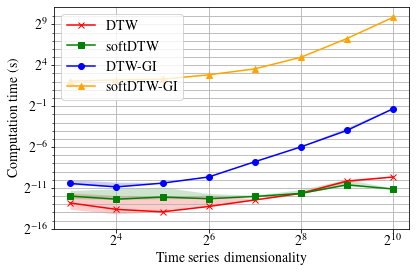

In [5]:
plt.figure()
for idx_f, f_name in enumerate(list_names):
    plt.loglog(dimensions,
               [np.median(dict_durations[f_name][d]) for d in dimensions],
               label=f_name, marker=markers[idx_f], c=colors[idx_f],
               basex=2, basey=2)
    plt.fill_between(dimensions,
                     [np.percentile(dict_durations[f_name][d], perc)
                      for d in dimensions],
                     [np.percentile(dict_durations[f_name][d], 100 - perc)
                      for d in dimensions],
                     alpha=0.2, facecolor=colors[idx_f])
plt.xlabel("Time series dimensionality")
plt.ylabel("Computation time (s)")
plt.legend(loc="upper left")
plt.gca().set_yticks([2 ** i for i in range(-16, 11)], minor=True)
plt.gca().yaxis.set_minor_formatter(plt.NullFormatter())
plt.grid(True, which="both")
plt.tight_layout()
plt.show()